In [1]:
%load_ext autoreload
%autoreload

In [2]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
warnings.filterwarnings("ignore", "external/local_xla/xla/")
warnings.filterwarnings("ignore", "TensorRT")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import numpy as np
import crc

In [4]:
N     = 0
q_0   = np.linspace(1, 10, 1000) # train          : 1,000
q_1   = np.linspace(1.0045, 10.0045, 1000) # test : 1,000
q_2   = np.linspace(1, 10, 10000) # dense train   : 10,000
q_3   = np.linspace(1, 10, 2**16) # DENSE train   : 65,536 = 2**16
q_4   = np.linspace(1, 10, 10)
q     = [q_0, q_1, q_2, q_3, q_4] 
time  = np.linspace(-5000, 250, 5251)
modes = [
    '2,2', 
    # '3,3', 
    # '3,2', 
    # '4,4', 
    # '4,3',
    # '5,5'
]
PRECESSING = True

In [5]:
# np.save(f"../datasets_new/spinless/time.npy", time)

In [280]:
if not PRECESSING:
    wf_input = {
        'q'                 : q[N],
        'chi_1z'            : 0,
        'chi_2z'            : 0,
        'omega0'            : 0.015,
        'time'              : time,
        'modes_to_generate' : modes,
        'spin'              : False,
        'N'                 : N
    }
elif PRECESSING:
    wf_input = {
        'q'                 : q[N],
        'chi_1x' : chi_1x, 'chi_1y' : chi_1y, 'chi_1z' : chi_1z,
        'chi_2x' : chi_2x, 'chi_2y' : chi_2y, 'chi_2z' : chi_2z,
        'omega0'            : 0.015,
        'time'              : time,
        'modes_to_generate' : modes,
        'spin'              : False,
        'N'                 : N
    }

In [286]:
spin_tag = "spin" if wf_input['spin'] else "spinless"

In [1]:
crc.build_directories(spin_tag, wf_input['N'], modes=wf_input['modes_to_generate'])
crc.make_params(wf_input['spin'], wf_input['N'], wf_input['q'], wf_input['chi_1z'], wf_input['chi_2z'])
crc.generate_waveforms_SEOBNRv5HM_to_save(**wf_input)

NameError: name 'crc' is not defined

In [290]:
waveforms = crc.load_waveforms('2,2', 0, spin=False, aligned=False)

In [195]:
# import pyseobnr

In [196]:
# t, modes_generated, data = pyseobnr.generate_waveform.generate_modes_opt(
#             4, 0, 0, 0.015,
#             omega_ref   = 0.015,
#             approximant = 'SEOBNRv5HM',
#             settings    = None,
#             debug       = True
# )
# h = crc.interpolate(modes_generated['2,2'], t, time)
# h

In [197]:
%load_ext autoreload
%autoreload
waveforms = crc.generate_waveforms_SEOBNRv5HM(**wf_input)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generation finished.


In [198]:
# crc.add_A_phi(waveforms)

In [199]:
# crc.save_waveforms(waveforms, wf_input['time'], N, False, wf_input)

In [18]:
import matplotlib.pyplot as plt

In [ ]:
waveforms = crc.add_A_phi(waveforms)

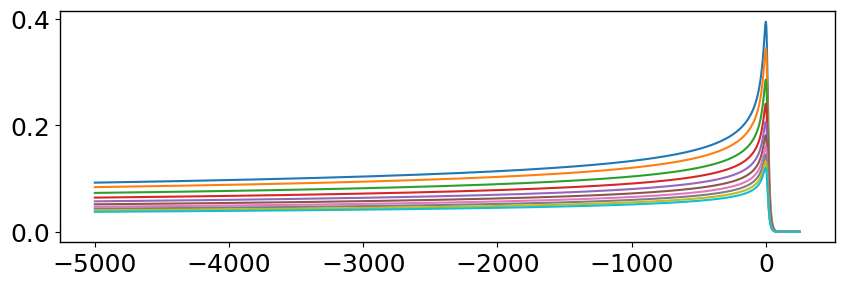

In [190]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
for i, wf_dict in waveforms['2,2'].items():
    axs.plot(time, wf_dict['wf']['A'])
# ax.plot(time, waveforms['2,2'][1]['wf']['A'])